In [1]:
#This code implements gradient descent for multiple liner regression.
#First we calculate the negative logliklihood, then the gradient, then we run 
#the gradient descent algorithm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Define the functions here:
def negative_loglikelihood(Y,x,theta):
    return sum((Y-x.dot(theta))**2)
#Calculate the gradient here:
def gradient(Y,x,theta):
    return ((-x.transpose().dot(Y-x.dot(theta))))
#Load the data
df=pd.read_csv('Advertising.csv')
#Look at the data
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Theta is : [[11.99514917]
 [ 0.05270635]]
NegativeLogliklihood at minimum is: [5203.62372682]


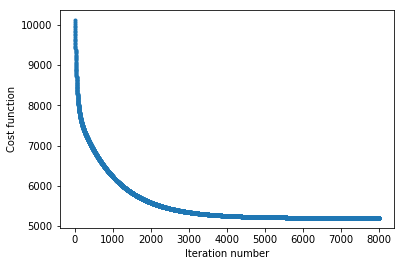

In [2]:
#Choose the newspaper column and see how this affects sales
x1=df[['newspaper']].values.astype(np.int)
#Add one column of 1 s, because model is 
#Y=x_0*beta_0+x_1*beta_1+......+ x_n*beta_n
x=np.insert(x1,0,values=1,axis=1)
Y=df[['sales']].values.astype(np.int)
N=x.shape[1]
N1=x.shape[0]
#Initialize the theta parameter, we add theta0 also:
theta=np.random.uniform(low=-.1,high=.1,size=(N,1))
theta[0:1]=np.random.uniform(low=1,high=20,size=(1,1))
#Iterate and update theta by using the gradient of the log-likihood
max_iter=8000
learning_rate=7.22e-6
n_log_like=[]
it_n=[]
for i in range(max_iter):
    #calculate the gradient
    dtheta=gradient(Y,x,theta)
    #update theta
    theta=theta-learning_rate*dtheta
    #calculate the value of the loglikelihood
    cost=negative_loglikelihood(Y,x,theta)
    n_log_like.append(cost)
    it_n.append(i)
#Plot the negative logliklihood
plt.plot(it_n, n_log_like,'.-')  
plt.xlabel('Iteration number')
plt.ylabel('Cost function')
#See the parameters
print('Theta is :', theta)
print('NegativeLogliklihood at minimum is:',n_log_like[max_iter-1])

Since this is converging,the parameter estimates are likely to be good. 
In the next step let us inspect visually.

Text(0, 0.5, 'sales')

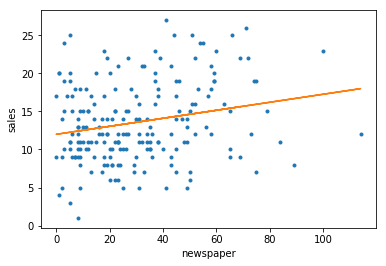

In [3]:
#Visually inspect if the predicted line mathces the data
#Plot the data
plt.plot(x[:,1],Y,'.')
#Plot the fit line
plt.plot(x[:,1],theta[0]+x[:,1]*theta[1])
plt.xlabel('newspaper')
plt.ylabel('sales')

Looking at the sales vs newspaper plot shows there should be no strong relationship. Data is spread all over. Now let us compare values that I got from the gradient descent algorithm matches with a standard package.

Theta is : [[11.87353     0.05536445]]


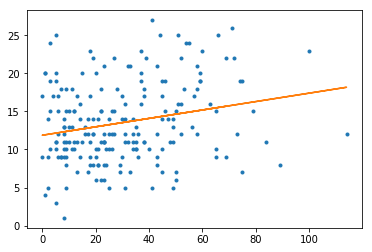

In [4]:
#To compare the results obtained above we now try built in functions
from sklearn.linear_model import LinearRegression
theta=np.random.uniform(low=-.1,high=.1,size=(N,1))
#Call fit function, depending on number of columns that predictor variable has
#sklearn will output that many beta values.
lm=LinearRegression(fit_intercept=False)
reg = lm.fit(x, Y)
plt.plot(x[:,1],Y,'.')
plt.plot(x[:,1],reg.coef_[0:,0]+x[:,1]*reg.coef_[0:,1])
print('Theta is :', reg.coef_)

Alright, looks like the numbers that I got from gradient descent that I wrote and the sklearn package reasonably  agrees with each other. In the next steps use the other variates in the model. 

Theta is : [[1.05144961]
 [0.0497888 ]
 [0.20750494]
 [0.00825845]]
NegativeLogliklihood at minimum is: [640.87932429]


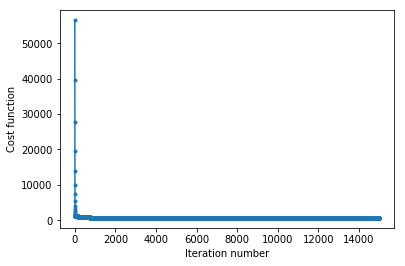

In [21]:
#Include all the variates in the model.
x1=df[['TV','radio','newspaper']].values.astype(np.int)
x=np.insert(x1,0,values=1,axis=1)
Y=df[['sales']].values.astype(np.int)
N=x.shape[1]
#Initialize theta, we add theta0 also:
theta=np.random.uniform(low=-.1,high=.1,size=(N,1))
theta[0:1]=np.random.uniform(low=1,high=20,size=(1,1))
#Iterate and update theta by using the gradient of the log-likihood
max_iter=15000
learning_rate=28e-9
n_log_like=[]
it_n=[]
for i in range(max_iter):
    #calculate the gradient
    dtheta=gradient(Y,x,theta)
    #update theta
    theta=theta-learning_rate*dtheta
    #calculate the value of the loglikelihood
    cost=negative_loglikelihood(Y,x,theta)
    n_log_like.append(cost)
    it_n.append(i)
#Plot the negative logliklihood
plt.plot(it_n, n_log_like,'.-')  
plt.xlabel('Iteration number')
plt.ylabel('Cost function')
#See the parameters
print('Theta is :', theta)
print('NegativeLogliklihood at minimum is:',n_log_like[max_iter-1])

This is converging. However I see that the value of the minimum log likelihood depends on the initial guesses. I ran it multiple times with different iteration number and learning rates to find the set points where it converges. After the fit let us see the residuals. 

Four principal assumptions which justify the use of linear regression models for purposes of inference or prediction:

(i) linearity and additivity of the relationship between dependent and independent variables:

    (a) The expected value of dependent variable is a straight-line function of each independent variable, holding the others fixed.

    (b) The slope of that line does not depend on the values of the other variables.

    (c)  The effects of different independent variables on the expected value of the dependent variable are additive.

(ii) statistical independence of the errors (in particular, no correlation between consecutive errors in the case of time series data)

(iii) homoscedasticity (constant variance) of the errors

    (a) versus time (in the case of time series data)

    (b) versus the predictions

    (c) versus any independent variable

(iv) normality of the error distribution.

Text(0, 0.5, 'ith sales')

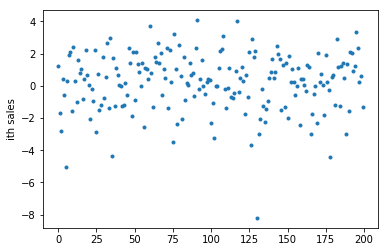

In [22]:
#Create the figure
plt.figure(2)
#Calculate the residuals. There might be a built in function. For now let us do it in the dumb way.
plt.plot(Y[:,0]-(theta[0]+x[:,1]*theta[1]+x[:,2]*theta[2]+x[:,3]*theta[3]),'.');
plt.ylabel('residuals')
plt.ylabel('ith sales')

Does not look too bad. But these are offset from zero. Let us look at the histogram of the residuals. 

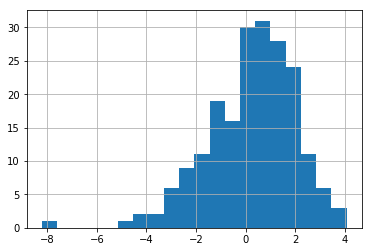

In [23]:
#resduals 
res=Y[:,0]-(theta[0]+x[:,1]*theta[1]+x[:,2]*theta[2]+x[:,3]*theta[3])
#Create the histogram with 20 bins. 
plt.hist(res,bins=20);
plt.grid()

It looks skewed towards left and the mean is not zero. For a good fit we expect the means to be normally distributed with mean zero and some variance.

Overall, now the coefficient for the newspaper column is small compared to when we looked only at the sales vs newspaper. This means sales is affected more strongly by TV and Radio. We need to look at the corellation matrix to see if any of the variables are correlated.

In order to move ahead lets see if the gradient descenct agrees with sklearn packages. 

Make a qq plot


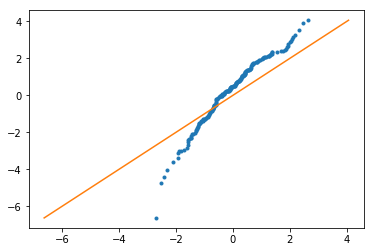

In [24]:
def quantil(x):
    xquant=[]
    x=np.sort(x)
    for i in np.arange(0,len(x)):
        xq=(np.quantile(x,((i+1)-.5)/len(x)))
        xquant.append(xq)
    return (xquant)
a=quantil(res) 
#Create the normal distribution
theoretical = np.random.normal(loc = 0, scale = 1, size=len(x))
b=quantil(theoretical)
plt.plot(b,a,'.');
plt.plot(a,a)

Theta is : [[ 2.48827312e+00  4.58024513e-02  1.91097454e-01 -5.53135442e-04]]


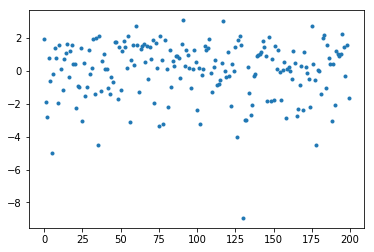

In [25]:
#To compare the results obtained above we now try built in functions
from sklearn.linear_model import LinearRegression
lm=LinearRegression(fit_intercept=False)
reg = lm.fit(x, Y)
#plt.plot(x[:,2],Y,'.')
#plt.plot(x[:,2],reg.coef_[0:,0]+x[:,2]*reg.coef_[0:,2])
print('Theta is :', reg.coef_)
plt.figure(3)
plt.plot(Y[:,0]-(reg.coef_[0:,0]+x[:,1]*reg.coef_[0:,1]+x[:,2]*reg.coef_[0:,2]+x[:,3]*reg.coef_[0:,3]),'.');

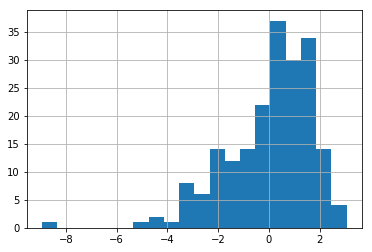

In [26]:
plt.hist(Y[:,0]-(reg.coef_[0:,0]+x[:,1]*reg.coef_[0:,1]+x[:,2]*reg.coef_[0:,2]+x[:,3]*reg.coef_[0:,3]),bins=20);
plt.grid()

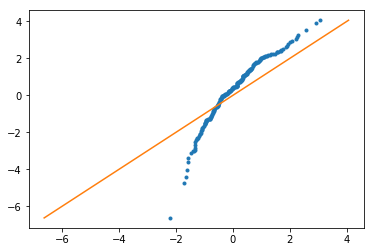

In [27]:
a=quantil(res) 
#Create the normal distribution
theoretical = np.random.normal(loc = 0, scale = 1, size=len(x))
b=quantil(theoretical)
plt.plot(b,a,'.');
plt.plot(a,a)

In [28]:
#Calculate NLL with theta calulated from sklearn
theta1=np.array([[reg.coef_[0,0]],[reg.coef_[0,1]],[reg.coef_[0,2]],[reg.coef_[0,3]]])
negative_loglikelihood(Y,x,theta1)

array([579.54810435])

Alright, SKlearn and the gradient descent gives comparable estimates.  

Now let us try to implement weighted regression. 
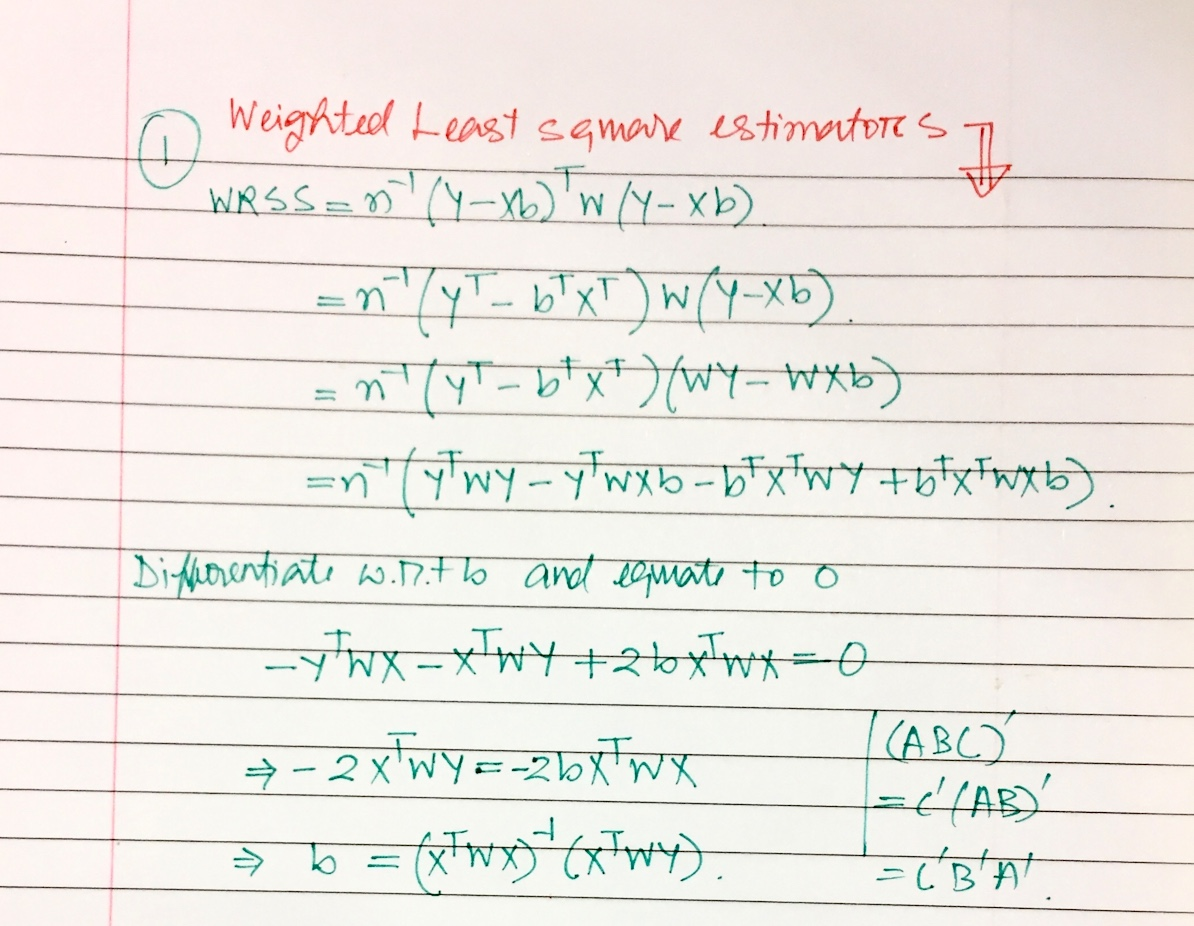


In [29]:
#Adding weight to the observaion of Y, assuming weight is  1/(square root of Y) 
wn=len(x)
#Create a matrix of zeros
w=np.zeros((wn,wn))
#Add the square root of Y to the diagonal
np.fill_diagonal(w, 1/(Y[:,0]**.5))

In [30]:
#To implement weighted least squares need inverse of matrix, so import
from numpy.linalg import inv
#This is the formula
b=inv(x.transpose().dot(w).dot(x)).dot(x.transpose().dot(w).dot(Y))
#Print the values of the parameters
print('The parameters from Weighted least squares are: ', b)

The parameters from Weighted least squares are:  [[2.44772647]
 [0.04749916]
 [0.16470638]
 [0.00637672]]


The parameters are comparable to what we observed with the model without weight. Without knowing how to determine the weights I am unable to  make sense. 
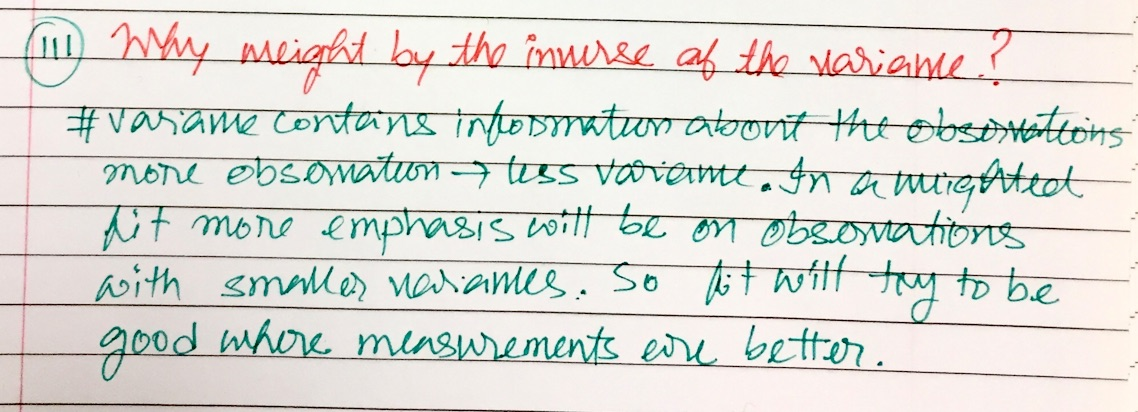